In [26]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Arcite\Downloads\housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
print(df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [29]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

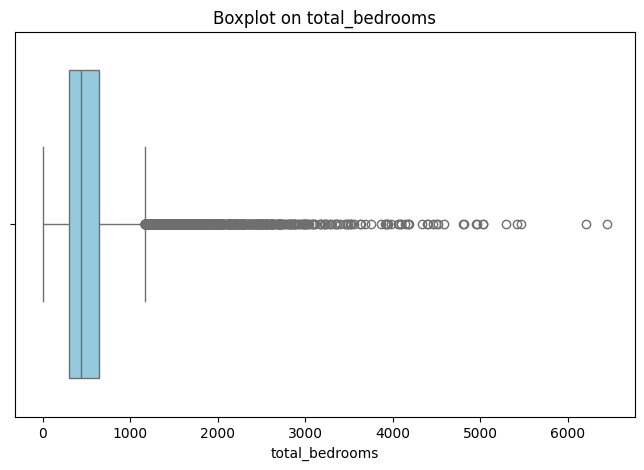

In [14]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x=df['total_bedrooms'],color='skyblue')
plt.title('Boxplot on total_bedrooms')
plt.xlabel('total_bedrooms')
plt.show()

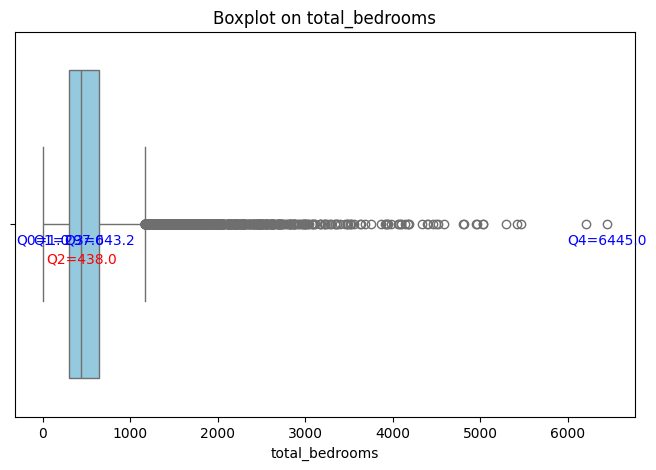

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['total_bedrooms'],color='skyblue')
q0=df['total_bedrooms'].min()
q1=df['total_bedrooms'].quantile(0.25)
q2=df['total_bedrooms'].quantile(0.50)
q3=df['total_bedrooms'].quantile(0.75)
q4=df['total_bedrooms'].max()
plt.text(q0,0.05,f'Q0={q0:.1f}',ha='center',color='blue')
plt.text(q1,0.05,f'Q1={q1:.1f}',ha='center',color='blue')
plt.text(q2,0.10,f'Q2={q2:.1f}',ha='center',color='red')
plt.text(q3,0.05,f'Q3={q3:.1f}',ha='center',color='blue')
plt.text(q4,0.05,f'Q4={q4:.1f}',ha='center',color='blue')
plt.title('Boxplot on total_bedrooms')
plt.xlabel('total_bedrooms')
plt.show()

In [22]:
import pandas as pd
Q1=df['total_bedrooms'].quantile(0.25)
Q3=df['total_bedrooms'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['total_bedrooms']>=l)&(df['total_bedrooms']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)

Original data (20640, 10)
After removing outlayers        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   



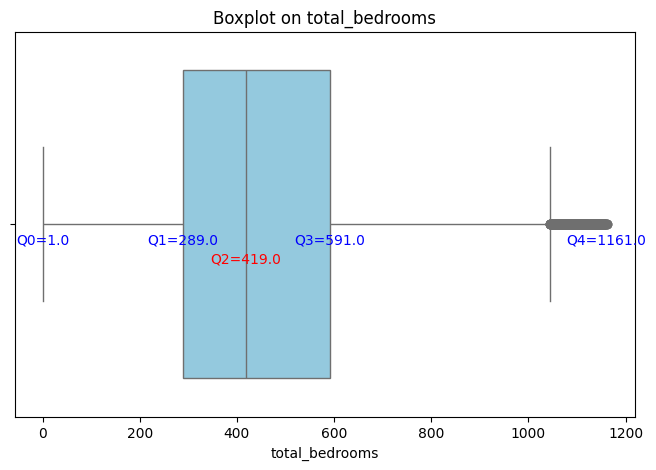

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df2['total_bedrooms'],color='skyblue')
q0=df1['total_bedrooms'].min()
q1=df1['total_bedrooms'].quantile(0.25)
q2=df1['total_bedrooms'].quantile(0.50)
q3=df1['total_bedrooms'].quantile(0.75)
q4=df1['total_bedrooms'].max()
plt.text(q0,0.05,f'Q0={q0:.1f}',ha='center',color='blue')
plt.text(q1,0.05,f'Q1={q1:.1f}',ha='center',color='blue')
plt.text(q2,0.10,f'Q2={q2:.1f}',ha='center',color='red')
plt.text(q3,0.05,f'Q3={q3:.1f}',ha='center',color='blue')
plt.text(q4,0.05,f'Q4={q4:.1f}',ha='center',color='blue')
plt.title('Boxplot on total_bedrooms')
plt.xlabel('total_bedrooms')
plt.show()

In [30]:
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Using box plot the outliers in the total bedrooms are been removed,by doing the all the null values are also been removed.

In [31]:
df1['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8556
INLAND        6085
NEAR OCEAN    2531
NEAR BAY      2157
ISLAND           5
Name: count, dtype: int64

In [34]:
print("Correlation between total_bedrooms and median_house_value")
print(df['total_bedrooms'].corr(df['median_house_value']))

Correlation between total_bedrooms and median_house_value
0.04968618024734582


Very weak relation between them.

In [35]:
print("Correlation between longitude and median_house_value")
print(df['longitude'].corr(df['median_house_value']))
print("Correlation between latitude and median_house_value")
print(df['latitude'].corr(df['median_house_value']))
print("Correlation between housing_median_age and median_house_value")
print(df['housing_median_age'].corr(df['median_house_value']))
print("Correlation between total_rooms and median_house_value")
print(df['total_rooms'].corr(df['median_house_value']))
print("Correlation between population and median_house_value")
print(df['population'].corr(df['median_house_value']))
print("Correlation between households and median_house_value")
print(df['households'].corr(df['median_house_value']))
print("Correlation between median_income and median_house_value")
print(df['median_income'].corr(df['median_house_value']))


Correlation between longitude and median_house_value
-0.04596661511797854
Correlation between latitude and median_house_value
-0.14416027687465932
Correlation between housing_median_age and median_house_value
0.10562341249320999
Correlation between total_rooms and median_house_value
0.1341531138065631
Correlation between population and median_house_value
-0.024649678888894893
Correlation between households and median_house_value
0.06584265057005649
Correlation between median_income and median_house_value
0.6880752079585484


Longitude,population,households have very weak relation with the median house value.Latitude,housing_median_age,total_rooms has not that strong relation but median_income has a strong relation with median_house_value. 

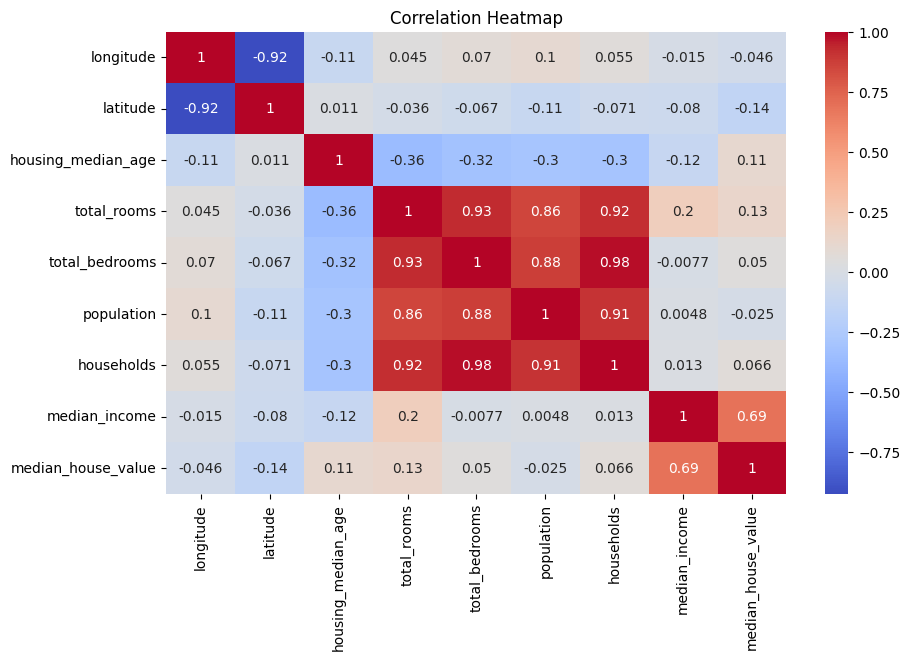

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

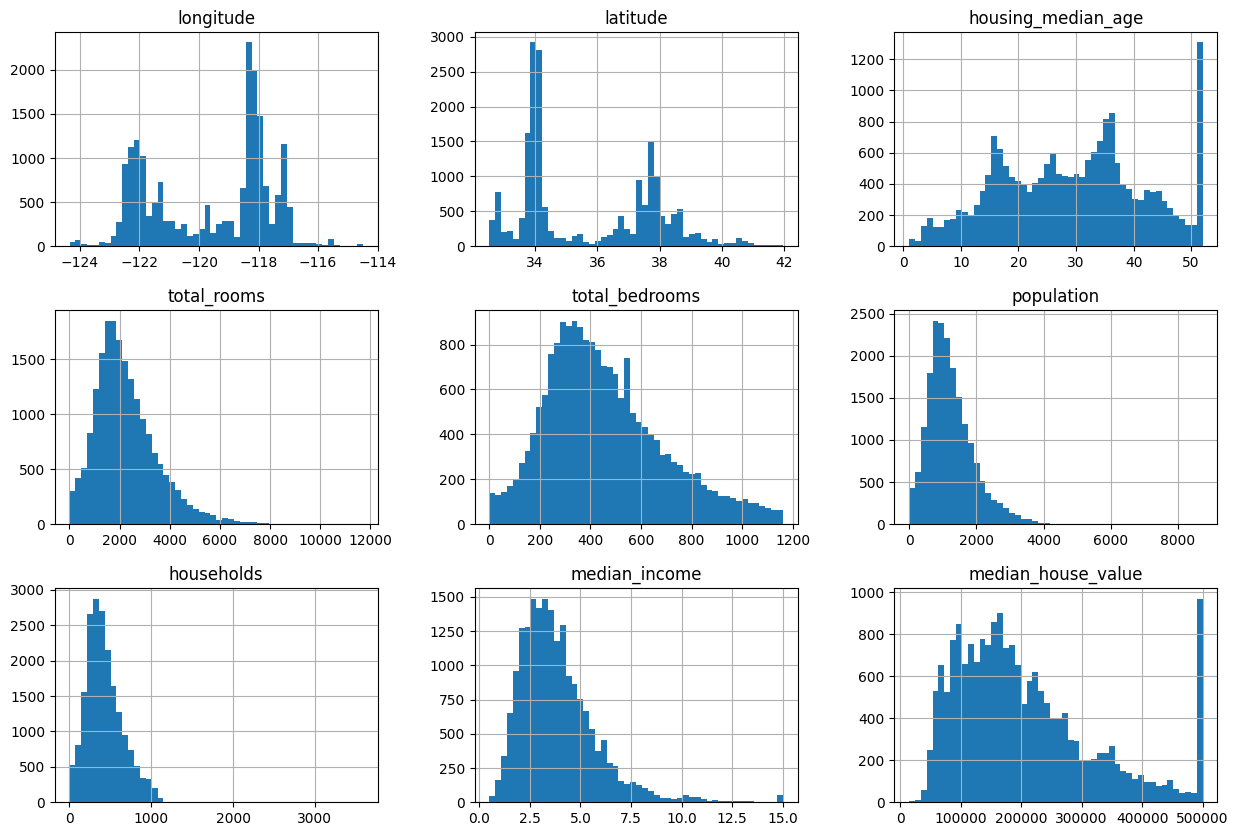

In [33]:
df1.hist(bins=50,figsize=(15,10))

Removing outliers.

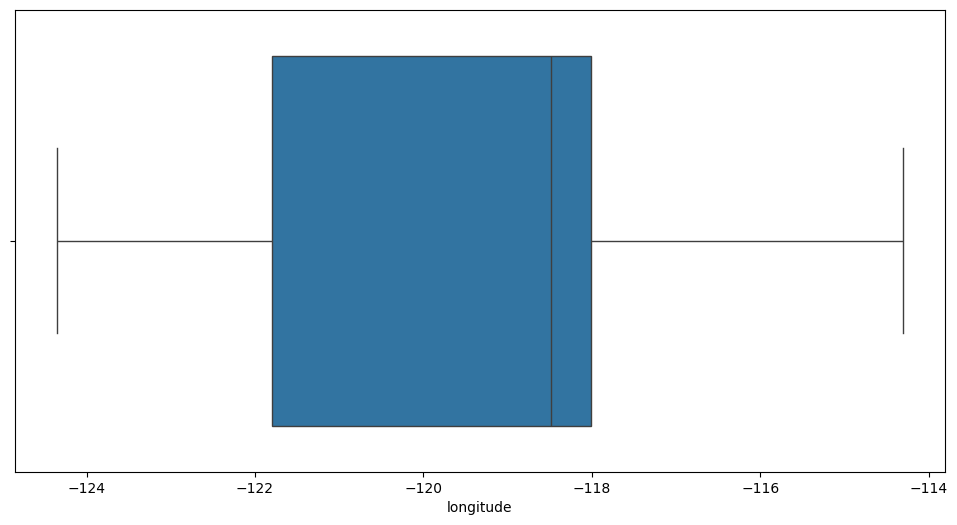

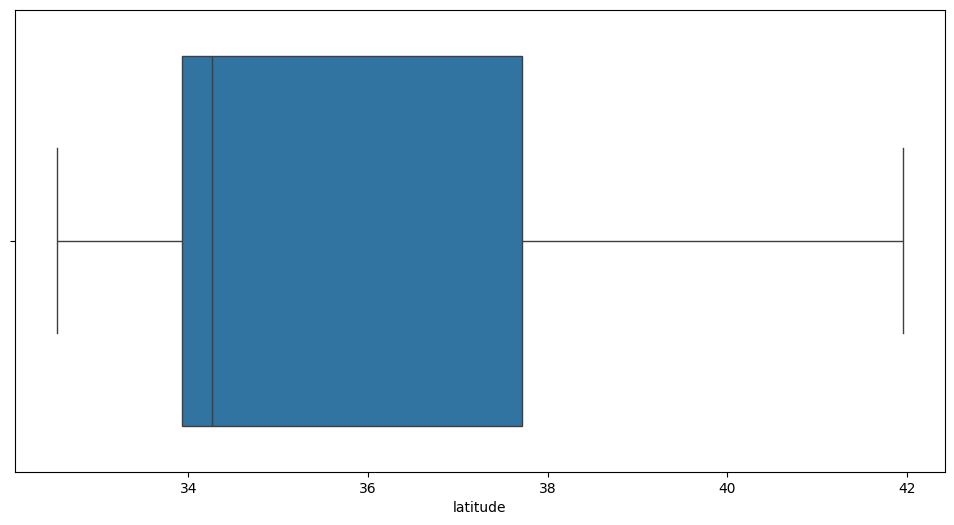

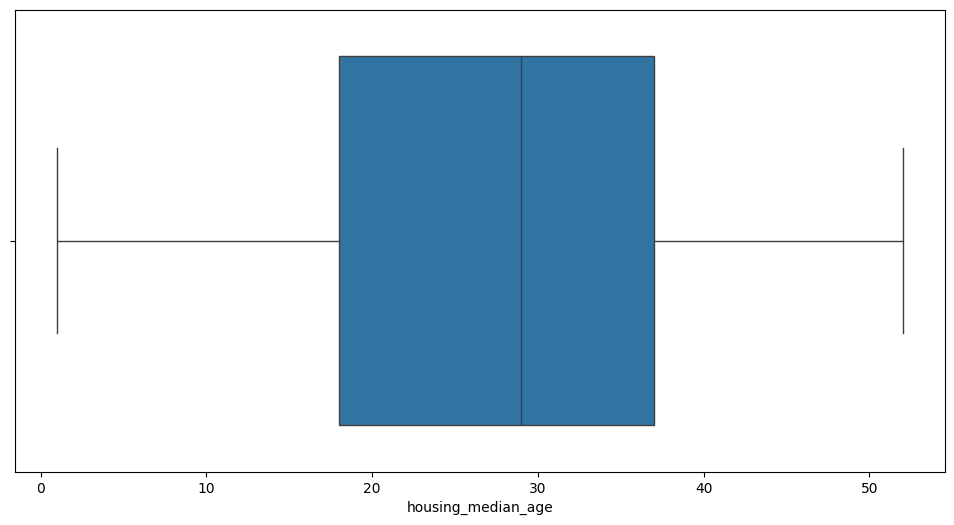

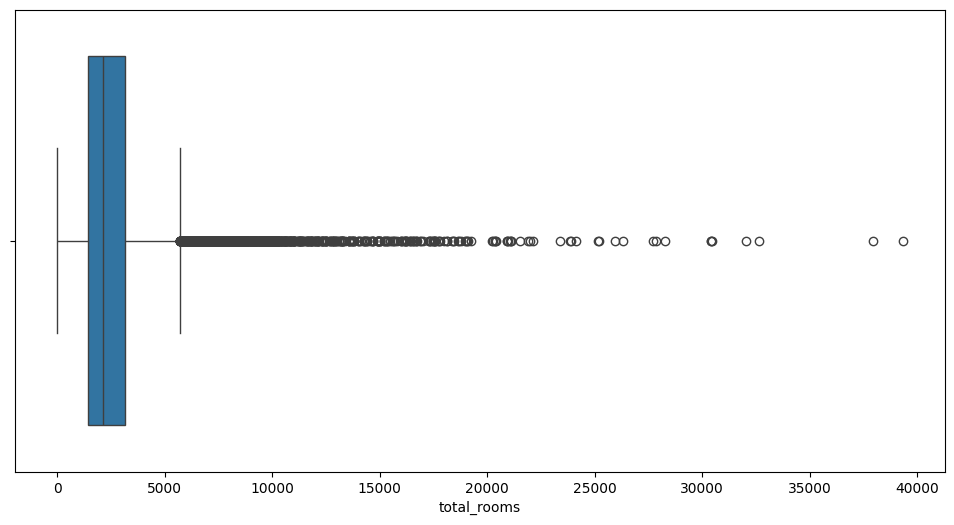

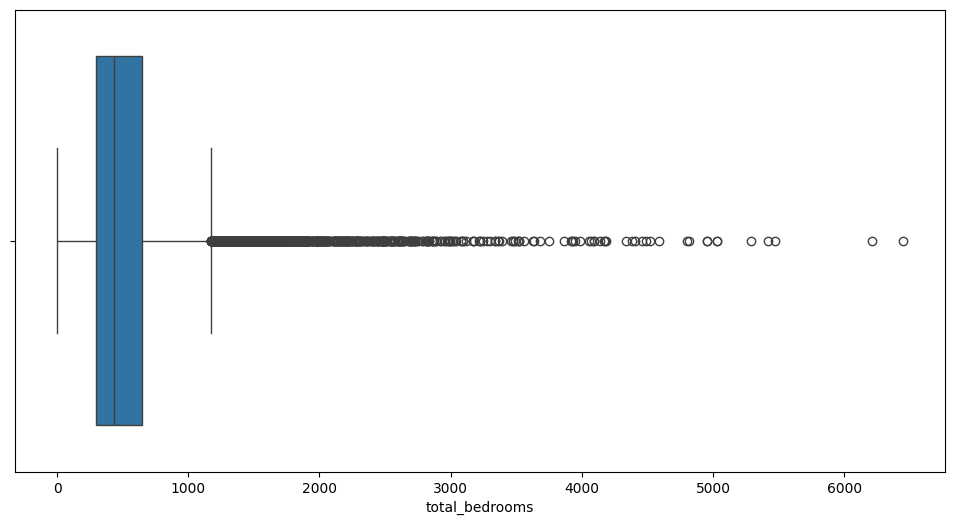

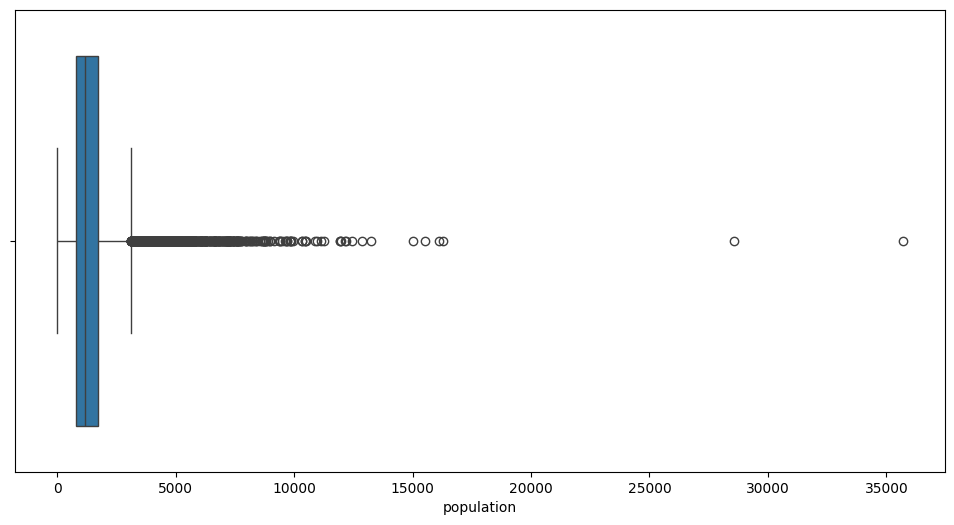

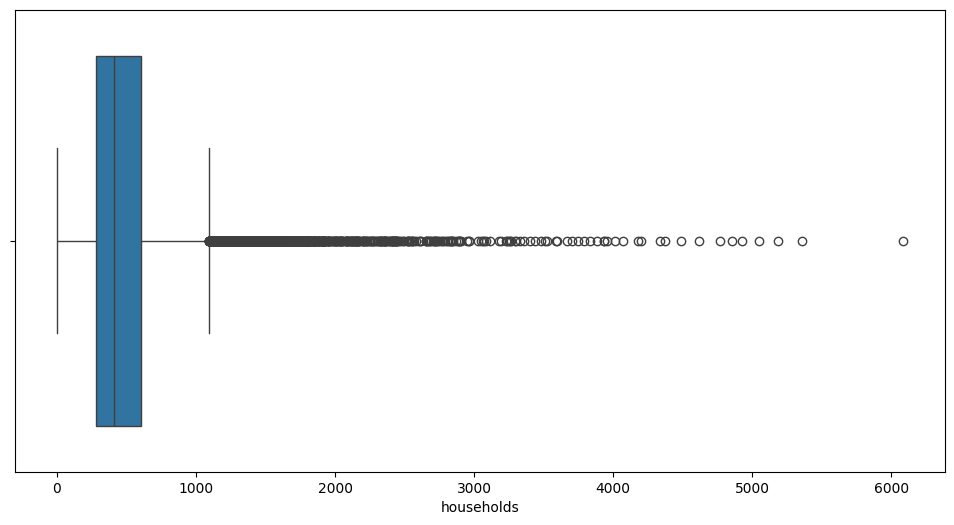

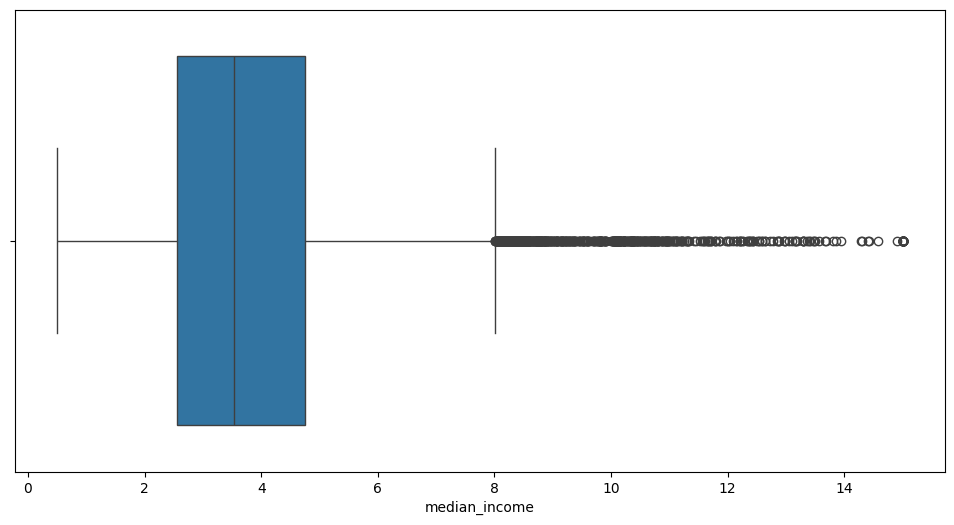

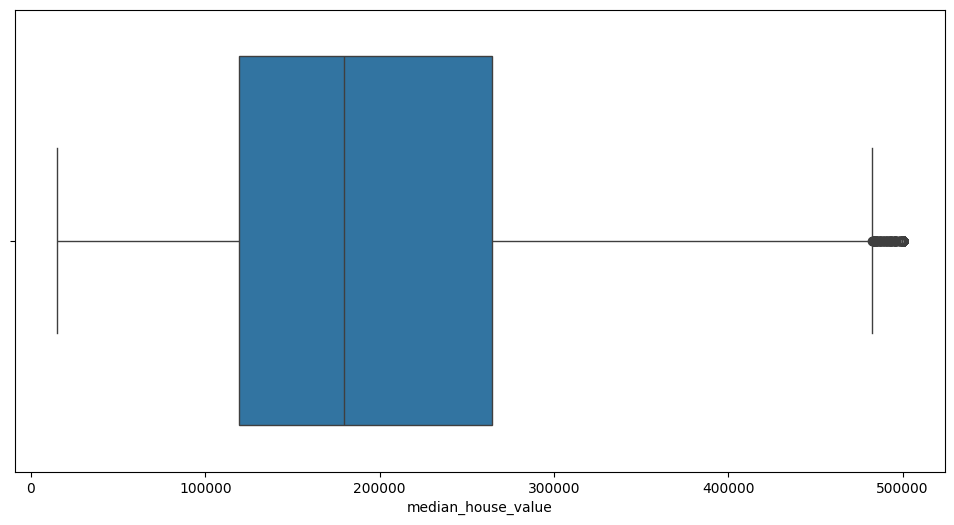

In [48]:
num_features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=df,ax=ax)

In [49]:
import pandas as pd
Q1=df['total_rooms'].quantile(0.25)
Q3=df['total_rooms'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['total_rooms']>=l)&(df['total_rooms']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)
import pandas as pd
Q1=df['population'].quantile(0.25)
Q3=df['population'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['population']>=l)&(df['population']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)
import pandas as pd
Q1=df['households'].quantile(0.25)
Q3=df['households'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['households']>=l)&(df['households']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)
import pandas as pd
Q1=df['median_income'].quantile(0.25)
Q3=df['median_income'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['median_income']>=l)&(df['median_income']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)
import pandas as pd
Q1=df['median_house_value'].quantile(0.25)
Q3=df['median_house_value'].quantile(0.75)
IQR=Q3-Q1
l=Q1-1.5*IQR
u=Q3+1.5*IQR
df1=df[(df['median_house_value']>=l)&(df['median_house_value']<=u)]
print("Original data",df.shape)
print("After removing outlayers",df1)

Original data (20640, 10)
After removing outlayers        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   



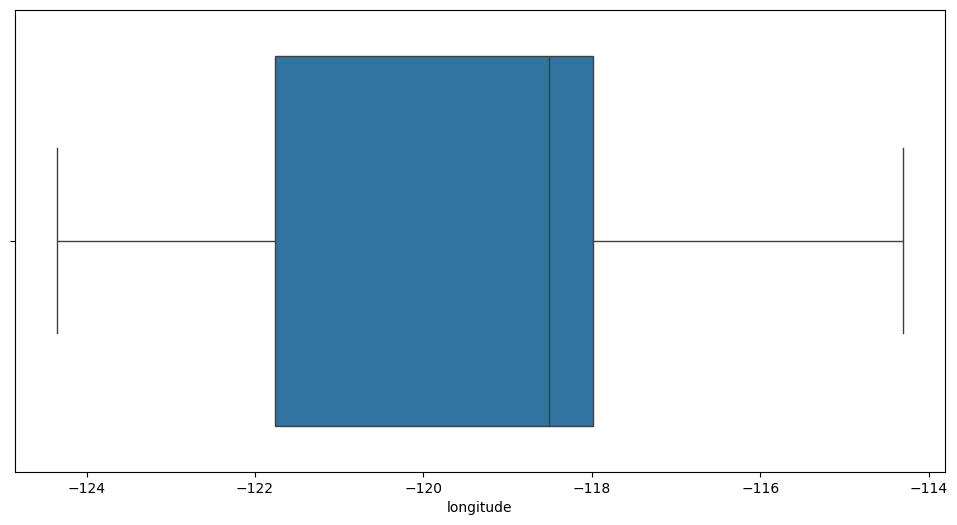

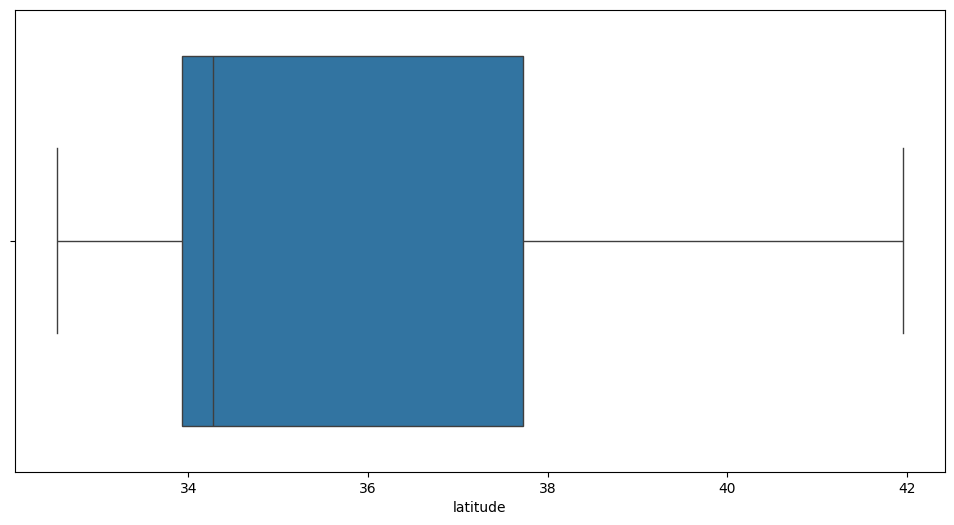

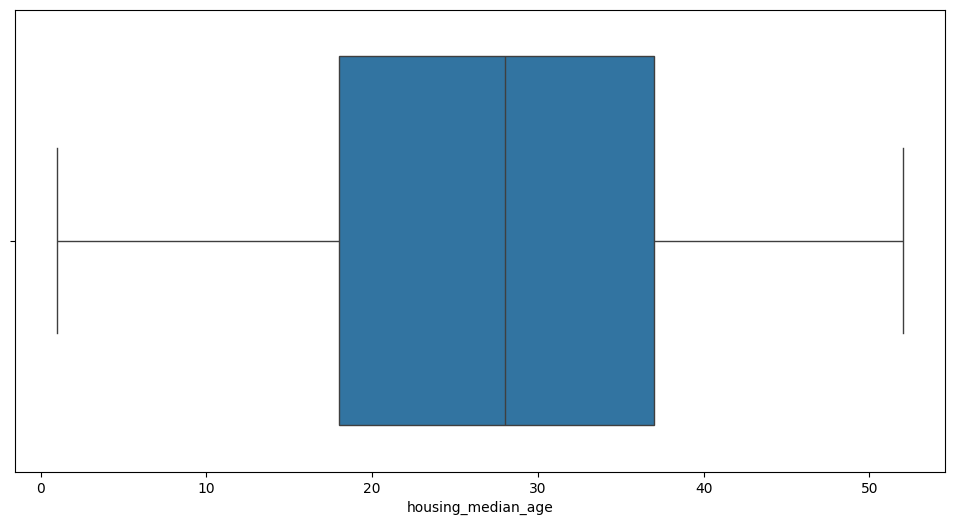

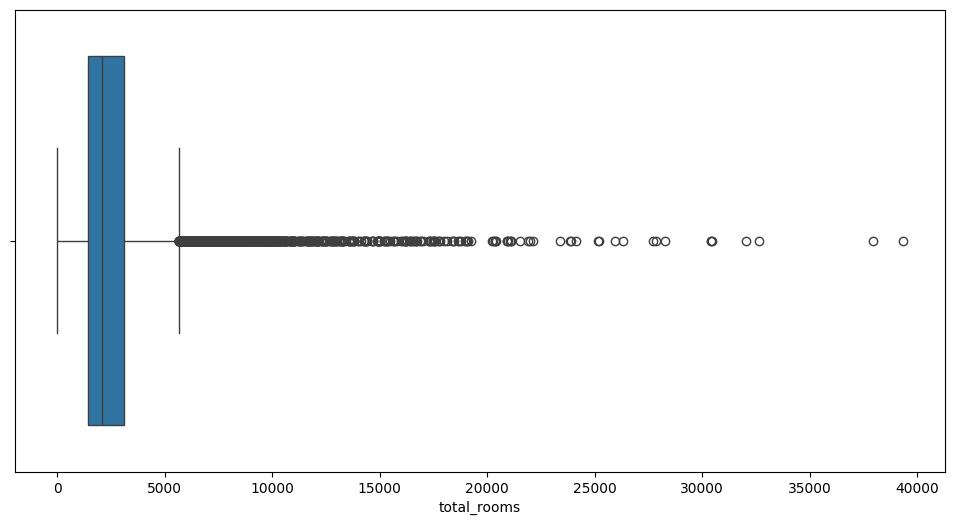

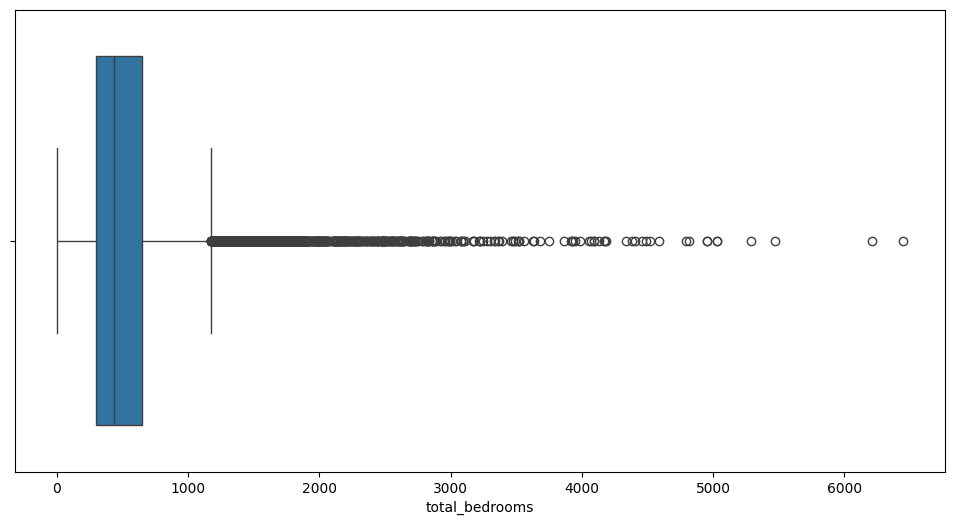

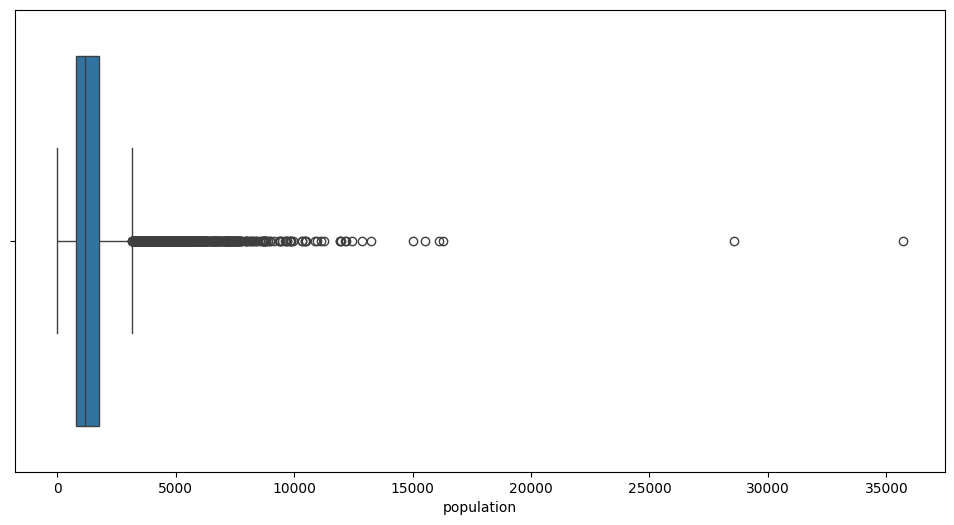

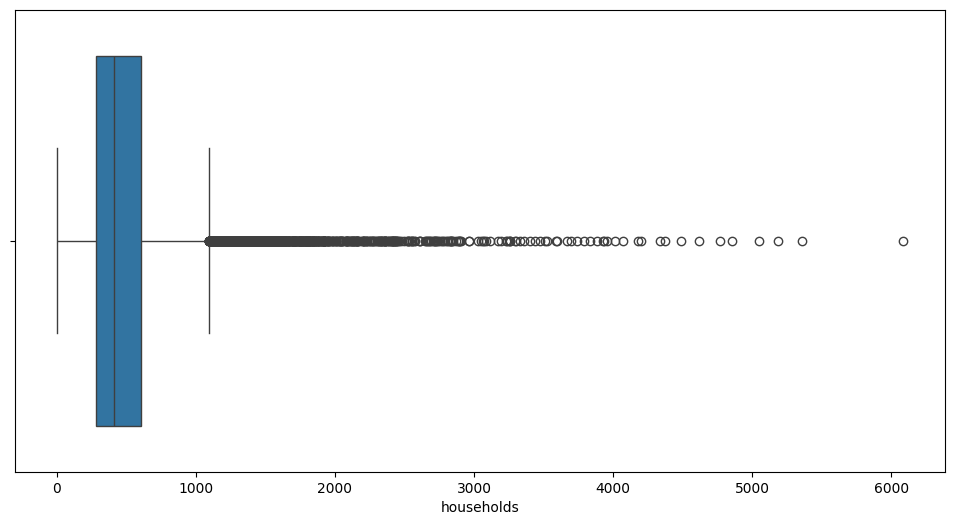

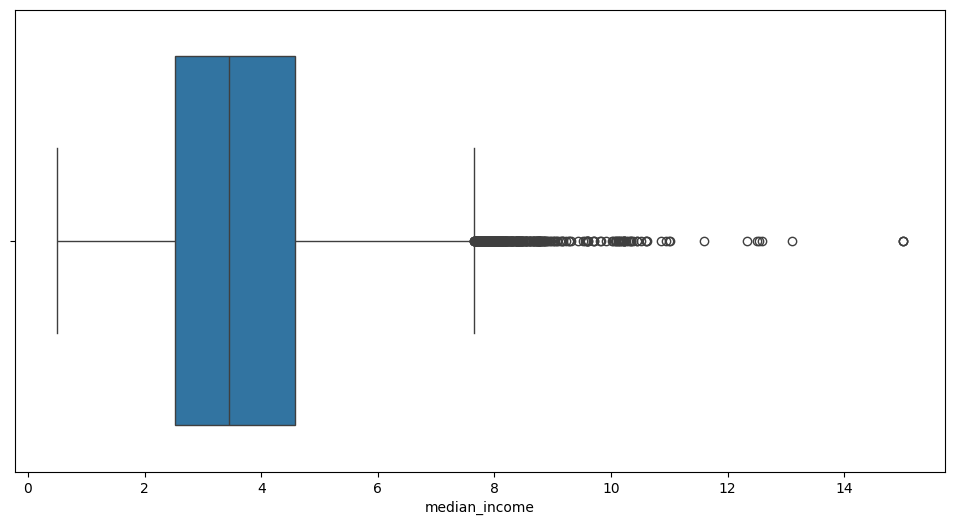

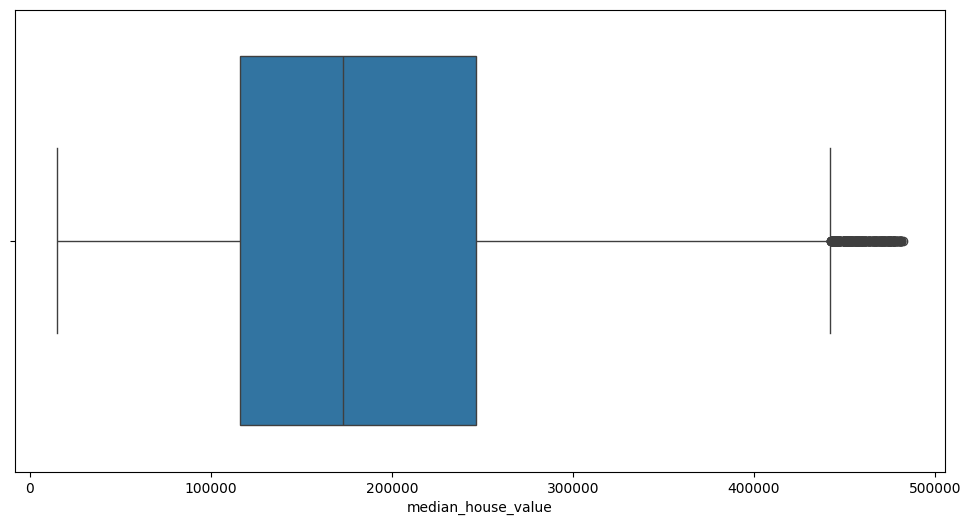

In [50]:
num_features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=df1,ax=ax)

Text(0.5, 1.0, 'Distribution of households')

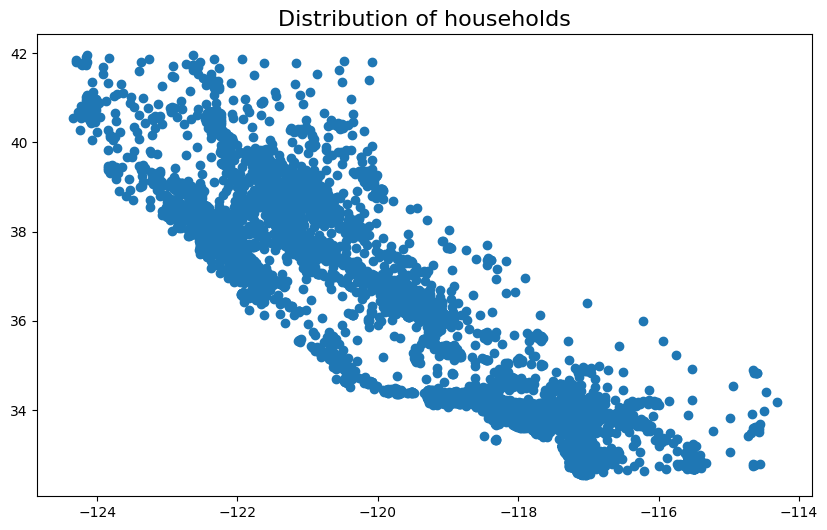

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x=df1['longitude'],y=df1['latitude'])
plt.title("Distribution of households",size=16)

Here we can see high density areas.

Text(0.5, 1.0, 'Distribution of households')

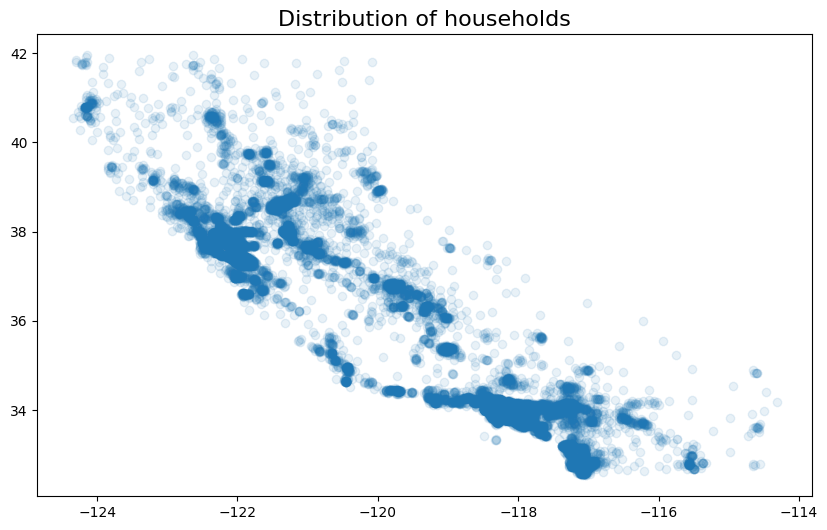

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=df1['longitude'],y=df1['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

Now, see the correlation of 'medial house value' with other columns. This is Pearson's correlation coefficient.

In [60]:
df3=df1.drop('ocean_proximity',axis=1)

In [61]:
corr_matrix=df3.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.644267
total_rooms           0.147526
households            0.099352
total_bedrooms        0.078678
housing_median_age    0.061480
population            0.017764
longitude            -0.047342
latitude             -0.149100
Name: median_house_value, dtype: float64

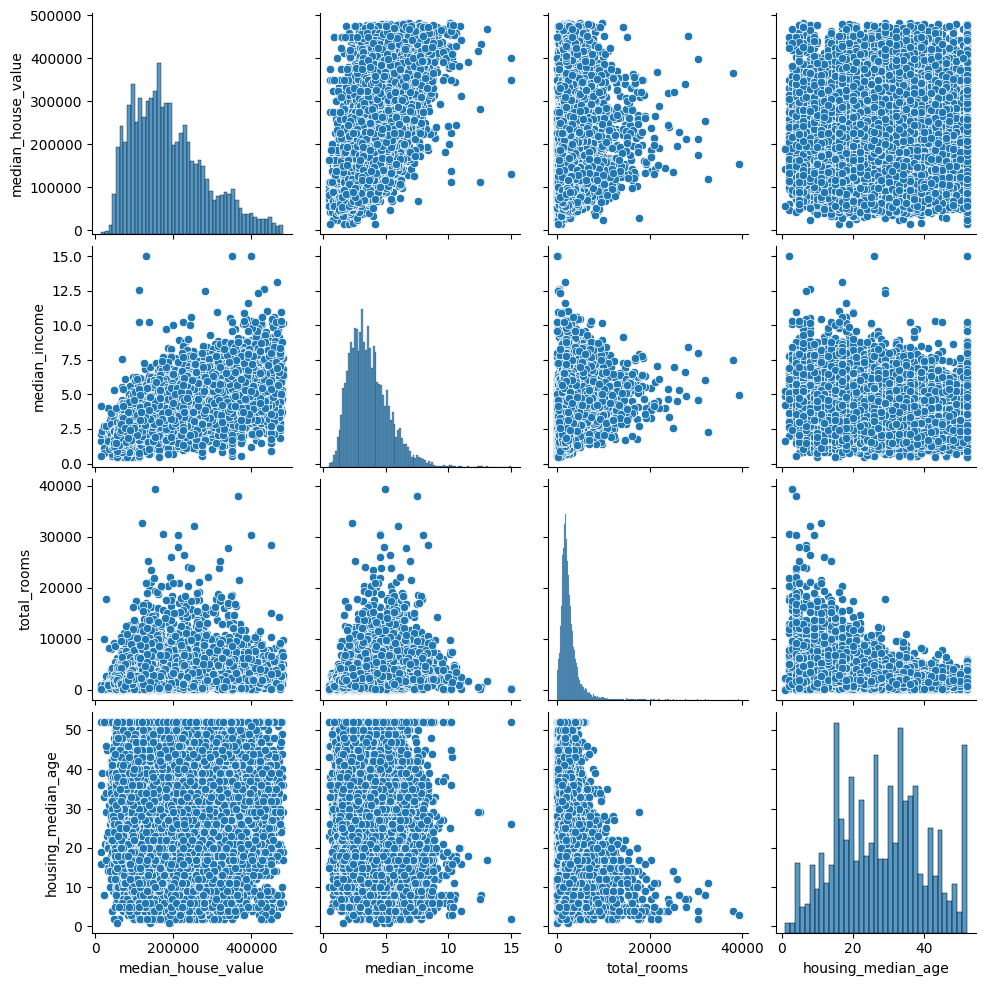

In [56]:
sns.pairplot(df1[['median_house_value','median_income','total_rooms','housing_median_age']])

Median Income is the most promising attribute to get Median Hosung Price.

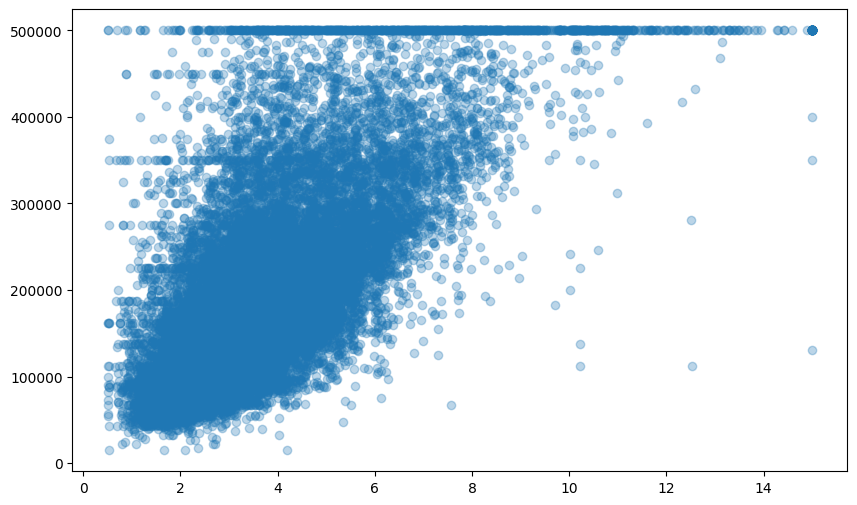

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['median_house_value'],x=df['median_income'],alpha=0.3)

A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.

Scaling.

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["ocean_proximity_code"]=encoder.fit_transform(df2['ocean_proximity'])
print(df2[['ocean_proximity',"ocean_proximity_code"]])

C:\Users\Arcite\AppData\Local\Temp\ipykernel_11088\2629991876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ocean_proximity_code"]=encoder.fit_transform(df2['ocean_proximity'])


      ocean_proximity  ocean_proximity_code
0            NEAR BAY                     3
1            NEAR BAY                     3
2            NEAR BAY                     3
3            NEAR BAY                     3
4            NEAR BAY                     3
...               ...                   ...
20635          INLAND                     1
20636          INLAND                     1
20637          INLAND                     1
20638          INLAND                     1
20639          INLAND                     1

[19334 rows x 2 columns]


To linear data

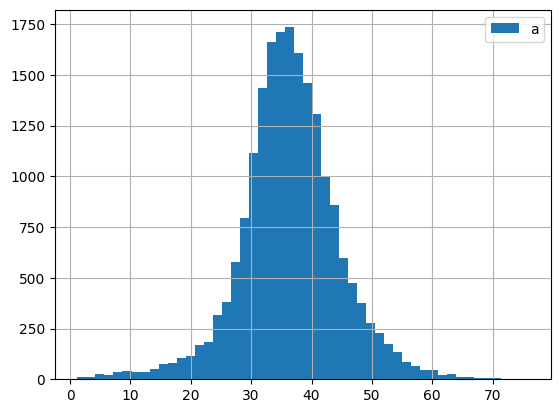

In [66]:
df1['households'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

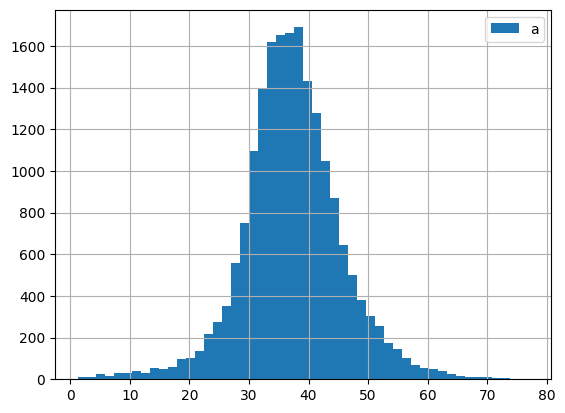

In [79]:
df1['total_bedrooms'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

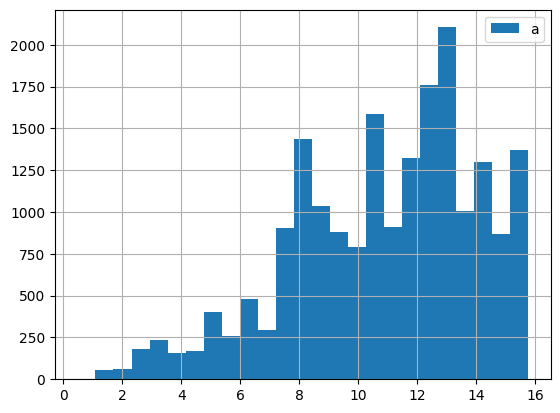

In [86]:
df1['housing_median_age'].apply(lambda x: np.log1p(x)**2).hist(bins=25,label='a')
plt.legend()

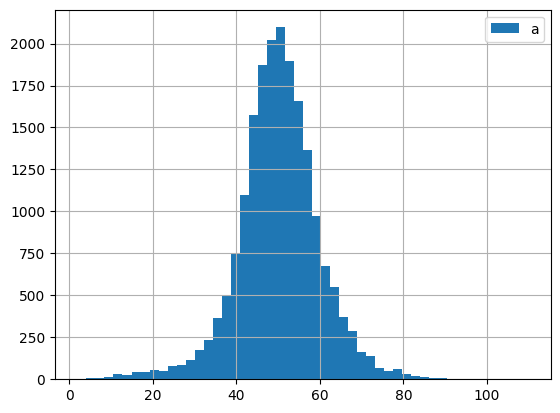

In [87]:
df1['population'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

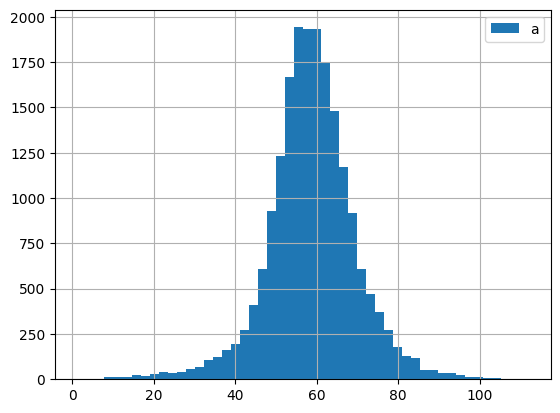

In [88]:
df1['total_rooms'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

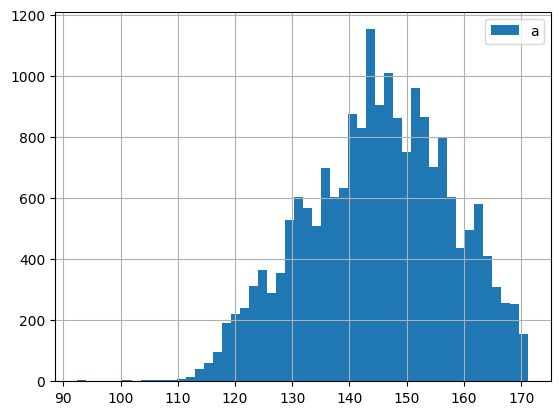

In [89]:
df1['median_house_value'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

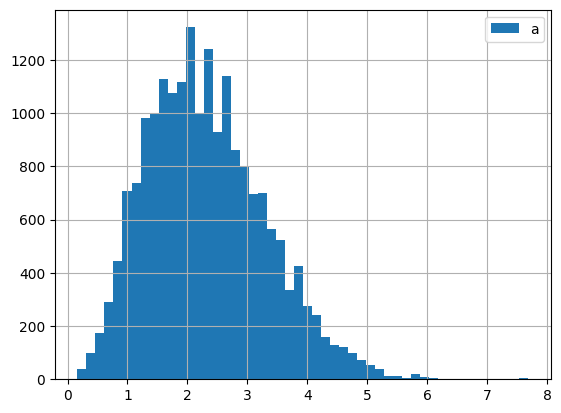

In [90]:
df1['median_income'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

T Test

Compare median house values between INLAND vs <1H OCEAN

In [94]:
from scipy.stats import ttest_ind
grp1=df[df['ocean_proximity']=='INLAND']['median_house_value']
grp2=df[df['ocean_proximity']=='<1H OCEAN']['median_house_value']
t_statistic,p_value=ttest_ind(grp1,grp2)
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: -76.75609549015218
P-value: 0.0


This means the difference in house values between the two groups is statistically significant.This can reject the null hypothesis(which says both groups have the same mean house value).